In [26]:
import pandas as pd
from prophet import Prophet

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [28]:
# Python
m = Prophet()
m.fit(df)

10:56:23 - cmdstanpy - INFO - Chain [1] start processing
10:56:27 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2931,2016-02-16
2932,2016-02-17
2933,2016-02-18
2934,2016-02-19
2935,2016-02-20


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2931,2016-02-16,7.708855,7.112812,8.340631
2932,2016-02-17,7.446625,6.805557,8.105635
2933,2016-02-18,7.368651,6.738377,8.022390
2934,2016-02-19,7.303362,6.735767,7.918102
2935,2016-02-20,6.998425,6.378171,7.620142


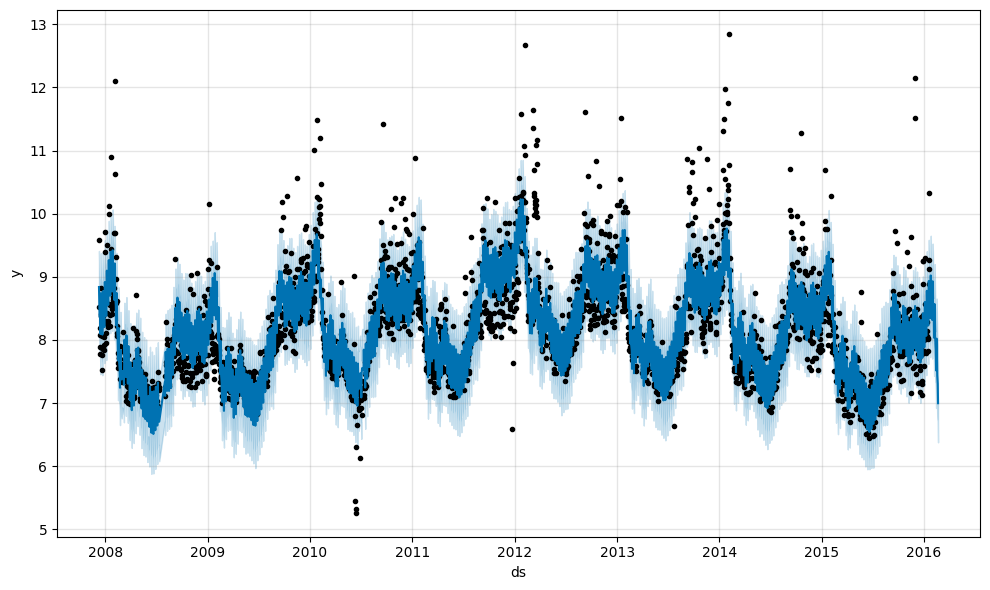

In [31]:
fig1 = m.plot(forecast)

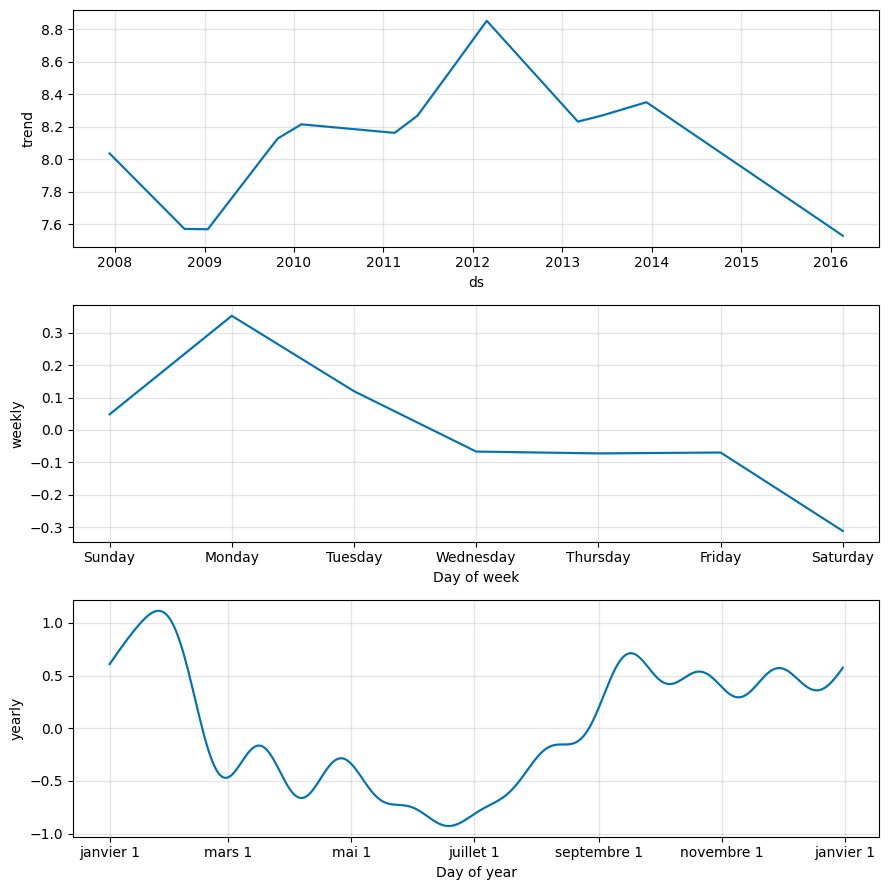

In [32]:
fig2 = m.plot_components(forecast)

In [33]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [34]:
plot_components_plotly(m, forecast)

In [35]:
# Convert 'ds' column in df to datetime for proper merging
df['ds'] = pd.to_datetime(df['ds'])
result = pd.merge(df, forecast[['ds', 'yhat']], on='ds')

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# MAE
mae = mean_absolute_error(result['y'], result['yhat'])

# RMSE
rmse = np.sqrt(mean_squared_error(result['y'], result['yhat']))

# MAPE
mape = mean_absolute_percentage_error(result['y'], result['yhat'])

In [37]:
print("MAE :", mae)
print("RMSE :", rmse)
print("MAPE :", mape, "%")

MAE : 0.3356648001995767
RMSE : 0.48362784164269884
MAPE : 0.03998208828876479 %


In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(result['y'], result['yhat'])
print(f"R² : {r2:.4f}")
print(f"Pourcentage de réussite : {r2*100:.2f}%")

R² : 0.6731
Pourcentage de réussite : 67.31%
